# Tree-based models with sklearn (Random Forest, Boosting, etc.)

## Load the iris dataset

In [2]:
import pandas as pd

iris = pd.read_csv('../../datasets/iris.csv', index_col=0)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Split the data into training and test sets

In [3]:
from sklearn.model_selection import train_test_split

X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((120, 4), (30, 4))

## Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, oob_score=True, random_state=123, verbose=1, class_weight=None)
rf.fit(x_train, y_train)
rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(oob_score=True, random_state=123, verbose=1)

### Out-of-bag error

In [5]:
rf.oob_score_

0.9333333333333333

### Draw single tree

[Text(0.38235294117647056, 0.9285714285714286, 'x[0] <= 5.55\ngini = 0.664\nsamples = 78\nvalue = [44, 35, 41]'),
 Text(0.11764705882352941, 0.7857142857142857, 'x[2] <= 2.35\ngini = 0.341\nsamples = 34\nvalue = [41, 10, 1]'),
 Text(0.058823529411764705, 0.6428571428571429, 'gini = 0.0\nsamples = 28\nvalue = [41, 0, 0]'),
 Text(0.17647058823529413, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.165\nsamples = 6\nvalue = [0, 10, 1]'),
 Text(0.11764705882352941, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 10, 0]'),
 Text(0.23529411764705882, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6470588235294118, 0.7857142857142857, 'x[2] <= 4.85\ngini = 0.517\nsamples = 44\nvalue = [3, 25, 40]'),
 Text(0.4117647058823529, 0.6428571428571429, 'x[3] <= 0.65\ngini = 0.261\nsamples = 20\nvalue = [3, 23, 1]'),
 Text(0.35294117647058826, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [3, 0, 0]'),
 Text(0.47058823529411764, 0.5, 'x[1] <= 2.95\ngini = 0.08\nsamples = 18\nvalue = [0, 23, 1]'),
 Text(0.4

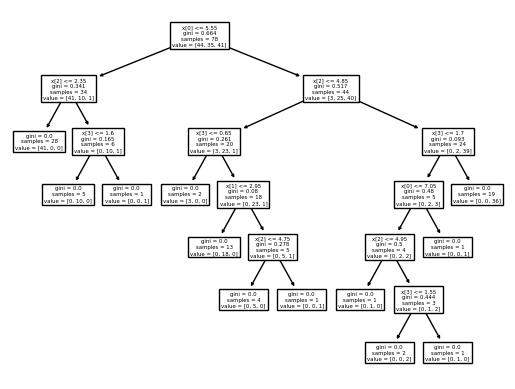

In [6]:
# Extract single tree
estimator = rf.estimators_[0]

from sklearn import tree

tree.plot_tree(estimator)

### Make predictions on the test set

In [12]:
y_pred = rf.predict(x_test)
y_pred

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array(['setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

## Evaluate the model

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9333333333333333

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.78      0.88         9
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30


### cross-validation

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
scores.mean(), scores.std()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


(0.96, 0.024944382578492935)

### Feature importance

<BarContainer object of 4 artists>

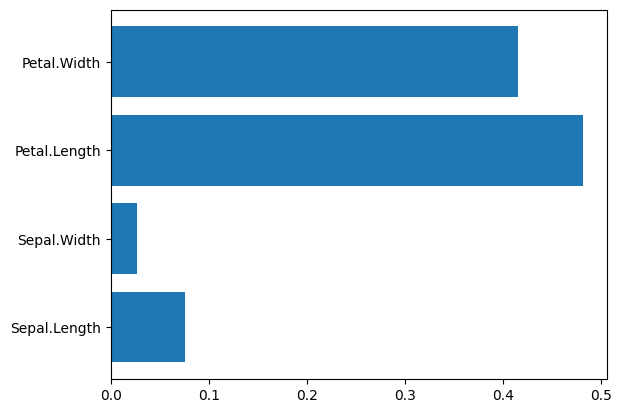

In [33]:
import matplotlib.pyplot as plt

plt.barh(x_train.columns, rf.feature_importances_)

## Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=123, verbose=1)
gb.fit(x_train, y_train)
gb

      Iter       Train Loss   Remaining Time 
         1           0.9148            0.20s
         2           0.7724            0.17s
         3           0.6583            0.16s
         4           0.5650            0.16s
         5           0.4877            0.15s
         6           0.4231            0.15s
         7           0.3685            0.15s
         8           0.3220            0.15s
         9           0.2824            0.15s
        10           0.2484            0.15s
        20           0.0756            0.13s
        30           0.0252            0.11s
        40           0.0099            0.09s
        50           0.0044            0.08s
        60           0.0020            0.06s
        70           0.0009            0.04s
        80           0.0005            0.03s
        90           0.0002            0.01s
       100           0.0001            0.00s


GradientBoostingClassifier(random_state=123, verbose=1)

### Make predictions on the test set

In [38]:
y_pred = gb.predict(x_test)
y_pred

array(['setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

### Evaluate the model

In [39]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.89      0.94         9
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


In [42]:
scores = cross_val_score(gb, X, y, cv=5)
scores.mean(), scores.std()

      Iter       Train Loss   Remaining Time 
         1           0.9207            0.18s
         2           0.7820            0.16s
         3           0.6697            0.16s
         4           0.5779            0.15s
         5           0.5002            0.15s
         6           0.4351            0.14s
         7           0.3801            0.14s
         8           0.3344            0.14s
         9           0.2942            0.14s
        10           0.2599            0.13s
        20           0.0800            0.12s
        30           0.0294            0.10s
        40           0.0129            0.09s
        50           0.0057            0.07s
        60           0.0027            0.06s
        70           0.0014            0.04s
        80           0.0007            0.03s
        90           0.0003            0.01s
       100           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9157            0.13s
        

(0.9600000000000002, 0.03265986323710903)

### Feature importance

<BarContainer object of 4 artists>

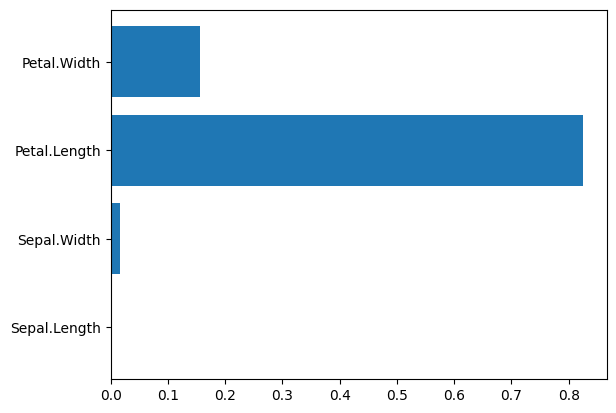

In [43]:
plt.barh(x_train.columns, gb.feature_importances_)